In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fertility = 'Fertility rate - Sex: all - Age: all - Variant: estimates'
gdp = 'GDP per capita (output, multiple price benchmarks)'
population = 'Population (historical estimates)'

df = pd.read_csv('children-per-woman-fertility-rate-vs-level-of-prosperity.csv')

df_2019 = df[df['Year'] == 2019]
df_World = df_2019[df_2019['Entity'] == 'World']
df_2019_clean = df_2019.dropna(subset=[fertility, gdp])
df_2019_clean
df_World

,Entity,Code,Year,Fertility rate - Sex: all - Age: all - Variant: estimates,"GDP per capita (output, multiple price benchmarks)",Population (historical estimates),Continent
57729,World,OWID_WRL,2019,2.4062,NaN,7.764951e+09,NaN


In [20]:
df_2019 = df[df['Year'] == 2019]
# df_2019
print(df_2019['Entity'])
# cara output semuanya tanpa angka
print(df_2019['Entity'].to_string(index=False))
# df_2019.to_csv('childrenperwoman2019.csv')


70          Afghanistan
516              Africa
588         Africa (UN)
665             Albania
924             Algeria
              ...      
57612    Western Sahara
57729             World
57989             Yemen
58374            Zambia
58634          Zimbabwe
Name: Entity, Length: 262, dtype: object
                                       Afghanistan
                                            Africa
                                       Africa (UN)
                                           Albania
                                           Algeria
                                    American Samoa
                                           Andorra
                                            Angola
                                          Anguilla
                               Antigua and Barbuda
                                         Argentina
                                           Armenia
                                             Aruba
                                

In [5]:
fertility = 'Fertility rate - Sex: all - Age: all - Variant: estimates'
gdp = 'GDP per capita (output, multiple price benchmarks)'
population = 'Population (historical estimates)'

In [21]:
df_2019_clean = df_2019.dropna(subset=[fertility, gdp])
df_2019_clean
# cara output semuanya
# cara jadi excel gimana ya?

,Entity,Code,Year,Fertility rate - Sex: all - Age: all - Variant: estimates,"GDP per capita (output, multiple price benchmarks)",Population (historical estimates),Continent
665,Albania,ALB,2019,1.4142,12531.7880,2873883.0,NaN
924,Algeria,DZA,2019,2.9881,11787.4920,42705372.0,NaN
1556,Angola,AGO,2019,5.4423,7159.5790,32353592.0,NaN
1815,Anguilla,AIA,2019,1.2884,15177.9230,15408.0,NaN
2199,Argentina,ARG,2019,1.9938,21826.8380,44745516.0,NaN
...,...,...,...,...,...,...,...
56022,Uruguay,URY,2019,1.5462,20545.4220,3428412.0,NaN
57270,Vietnam,VNM,2019,1.9481,7506.8170,95776712.0,NaN
57989,Yemen,YEM,2019,3.9626,1777.2511,31546694.0,NaN
58374,Zambia,ZMB,2019,4.4509,3179.1958,18380478.0,NaN


Coefficient:  [[-0.3019364]]
Intercept:  [11.09433938]
Correlation Coefficient:  -0.7951449154691838


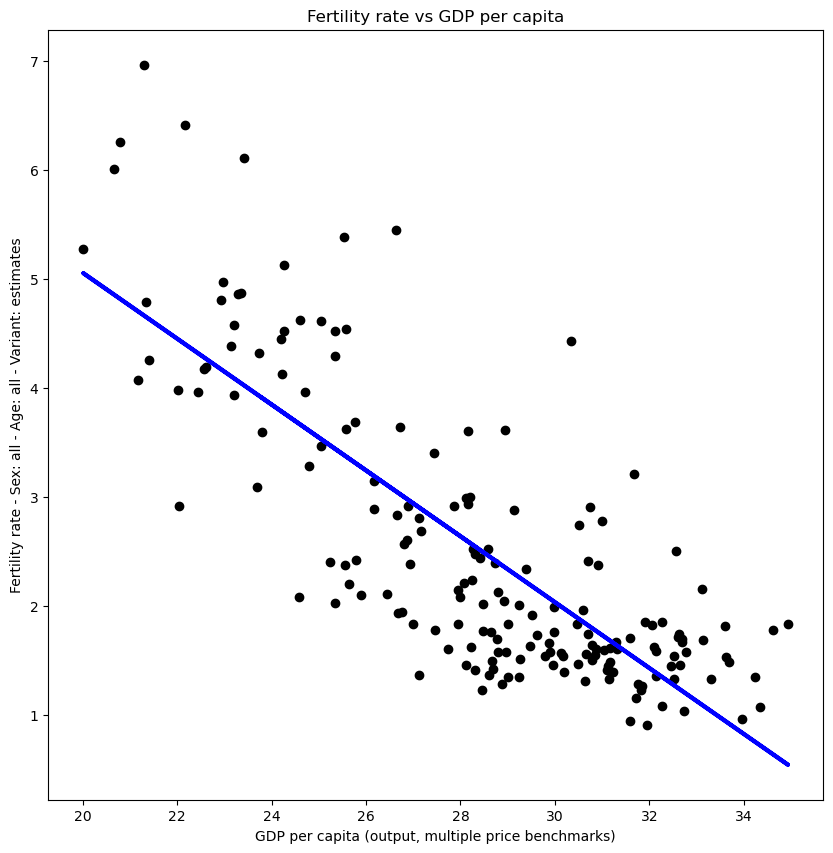

In [24]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df_2019_clean[gdp].values.reshape(-1, 1)
y = df_2019_clean[fertility].values.reshape(-1, 1)
X = 3*np.log(X)
model.fit(X, y)

print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Correlation Coefficient: ", np.corrcoef(X[:,0], y[:,0])[0,1])

# plot
plt.figure(figsize=(10, 10))
plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X), color='blue', linewidth=3)
plt.xlabel(gdp)
plt.ylabel(fertility)
plt.title('Fertility rate vs GDP per capita')
plt.show()